# SARIMA(p,d,q)(P,D,Q,s)
# Seasonal Autoregressive Integrated Moving Averages


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Herramientas
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # ETS Plots
                            

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/8.%20ARIMA%20autorregresivo%20integrado%20de%20medias%20moviles/Python/co2_mm_mlo.csv')

In [2]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [3]:
# Añadir una variable "date"
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

In [4]:
# Hacer que la variable "date" sea el indice
df.set_index('date',inplace=True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


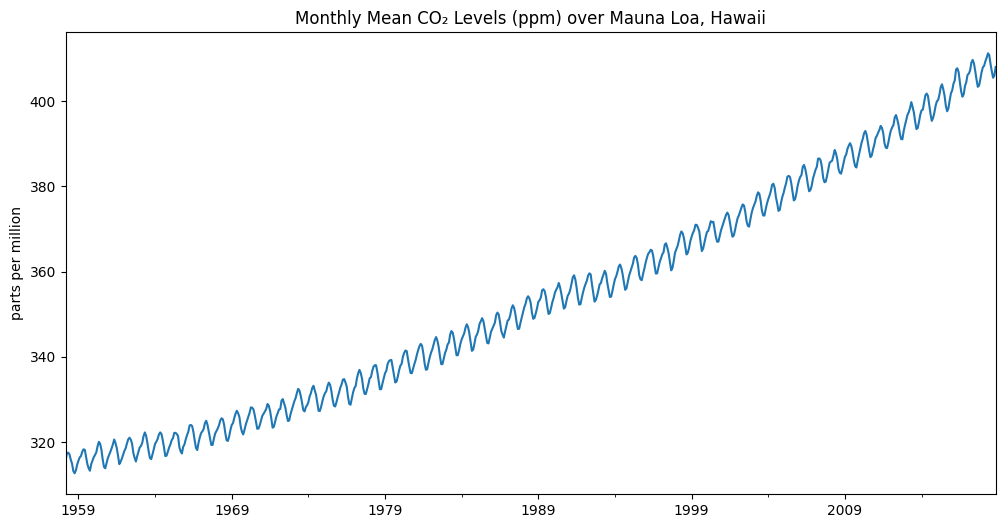

In [5]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' 

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Descomposición en 3 factores

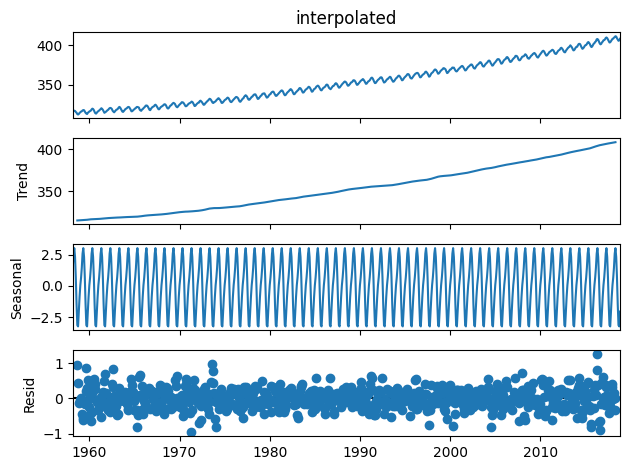

In [6]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

Aunque sea pequeña en comparación con la escala de los datos, hay una estacionalidad anual.

### Dividir en datos de entrenamiento y prueba

In [7]:
len(df)

729

In [8]:
# Prueba
train = df.iloc[:717]
test = df.iloc[717:]

### Modelo SARIMA(0,1,1)(1,0,1,12) 

In [9]:
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34158D+00    |proj g|=  2.55048D-01


 This problem is unconstrained.



At iterate    5    f=  4.83645D-01    |proj g|=  4.69831D+00

At iterate   10    f=  2.99004D-01    |proj g|=  4.94162D-02

At iterate   15    f=  2.96014D-01    |proj g|=  4.52537D-03

At iterate   20    f=  2.95989D-01    |proj g|=  4.37604D-03

At iterate   25    f=  2.95141D-01    |proj g|=  8.33053D-02

At iterate   30    f=  2.87173D-01    |proj g|=  3.92666D-02

At iterate   35    f=  2.86150D-01    |proj g|=  1.15809D-02

At iterate   40    f=  2.86121D-01    |proj g|=  3.71587D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     59      1     0     0   3.716D-04   2.861D-01
  F =  0.286121340673

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.149
Date:                            Mon, 11 Mar 2024   AIC                            418.298
Time:                                    19:50:05   BIC                            436.593
Sample:                                03-01-1958   HQIC                           425.363
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3710      0.033    -11.369      0.000      -0.435      -0.307
ar.S.L12       0.9997      0.000   3049.819      0.000       0.999       1.000
ma.S.L12      -0.8643      0.023    -37.696      0.000      -0.909      -0.819
sigma2         0.0960      0.005     20.589      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.70   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('SARIMA(0,1,1)(1,0,1,12) Predictions')

In [11]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.5836753, expected=406.81
predicted=407.7862585, expected=407.96
predicted=408.5313349, expected=408.32
predicted=409.4368343, expected=409.41
predicted=410.9970162, expected=410.24
predicted=411.600728 , expected=411.24
predicted=410.8189413, expected=410.79
predicted=409.1269575, expected=408.71
predicted=407.0259447, expected=406.99
predicted=405.5756708, expected=405.51
predicted=405.8476932, expected=406.0
predicted=407.3831193, expected=408.02


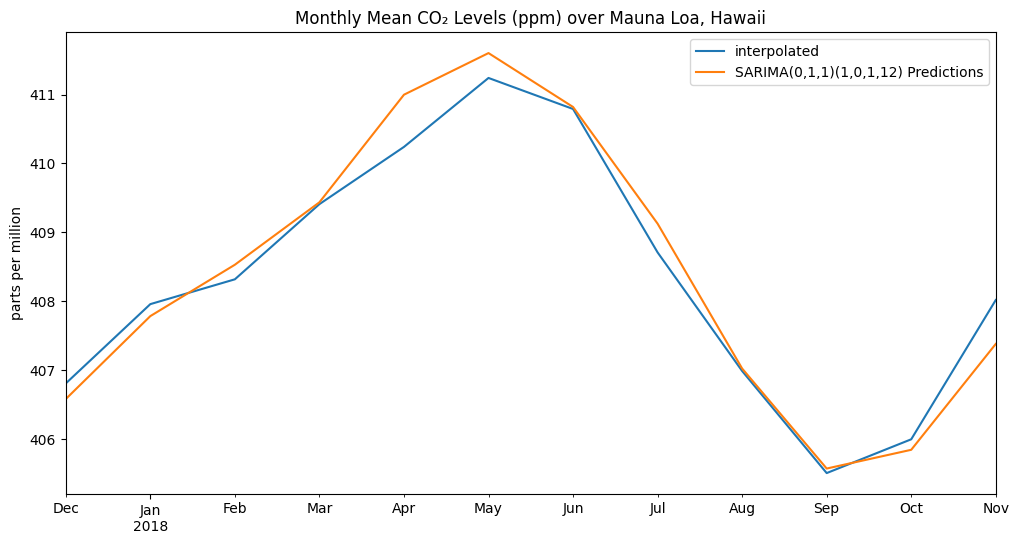

In [15]:
# Plot predictions against known values
title ='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Reentrenar el modelo con todos los datos y predecir el futuro

In [13]:
model = SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+36).rename('SARIMA(0,1,1)(1,0,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33311D+00    |proj g|=  2.60896D-01


 This problem is unconstrained.



At iterate    5    f=  6.18715D-01    |proj g|=  6.25432D+00

At iterate   10    f=  3.26501D-01    |proj g|=  7.54090D-02

At iterate   15    f=  3.12780D-01    |proj g|=  7.68963D-03

At iterate   20    f=  3.11032D-01    |proj g|=  9.12079D-02

At iterate   25    f=  2.92614D-01    |proj g|=  4.55191D-02

At iterate   30    f=  2.87399D-01    |proj g|=  2.28697D-02

At iterate   35    f=  2.87306D-01    |proj g|=  2.23368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     53      1     0     0   1.984D-05   2.873D-01
  F =  0.28730511963402755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

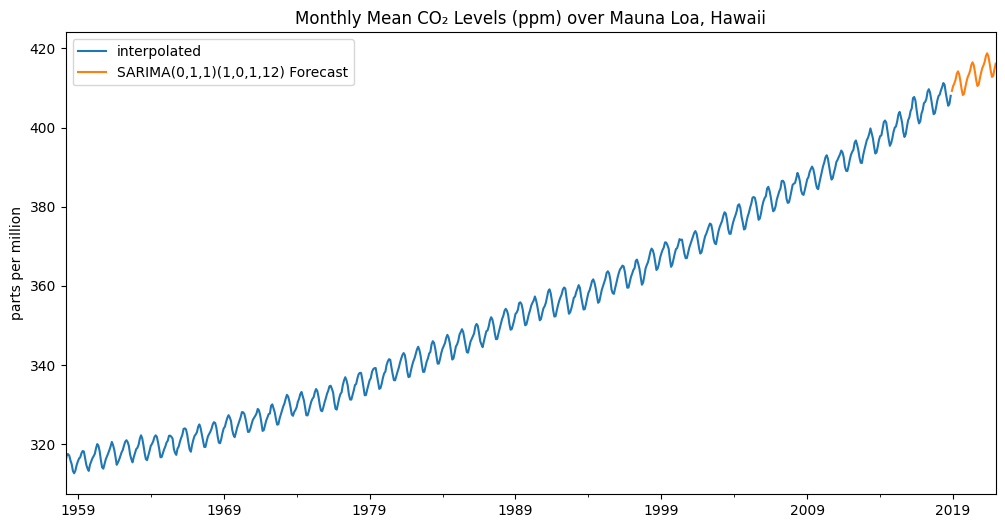

In [14]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel);